# TAREA # 1: COMPRENDER EL PROBLEMA Y EL CASO PRÁCTICO


<table>
  <tr><td>
    <img src="https://drive.google.com/uc?id=1Sa9nyrjRdlf5BEcGchaBTGnuSnleLwFk"
         alt="Fashion MNIST sprite"  width="1000">
  </td></tr>
  <tr><td align="center">
    <b>Figura 1. Clasificación de Enfermedades utilizando Deep Learning 
  </td></tr>
</table>


![alt text](https://drive.google.com/uc?id=1Q0mIrU2mP1fgmrra22s9HzSWNMB102P8)

![alt text](https://drive.google.com/uc?id=1QYLrCWMZ_6voXb5qsR9WfbymOuBHzGNa)

# TAREA # 2: IMPORTAR LIBRERÍAS Y CONJUNTO DE DATOS

In [ ]:
import os
import cv2
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
# Necesitarás montar tu disco usando los siguientes comandos:
# Para obtener más información sobre el montaje, consulta esto: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory

from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# Especificar el directorio del conjunto de entrenamiento
XRay_directory = "/content/drive/MyDrive/ds4b/4. Operations Department/train"

In [ ]:
# Listar las carpetas de dicho directorio
os.listdir(XRay_directory)

['0', '1', '2', '3']

In [ ]:
# Utilizar el generador de imágenes para generar datos de imágenes de tensores y normalizarlos
# Utilizar el 20% de los datos para la validación cruzada posterior
image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [ ]:
# Genere lotes de 40 imágenes
# El número total de imágenes es 133 * 4 = 532 imágenes
# El entrenamiento usará es 428 (80%) y la validación usará 104 (20%)
# Realizar muestreo aleatoria y cambio del tamaño en las imágenes
train_generator = image_generator.flow_from_directory(batch_size=40, directory=XRay_directory, shuffle=True,
                                                      target_size=(256, 256), class_mode="categorical", subset="training")

Found 428 images belonging to 4 classes.


In [ ]:
train_generator = image_generator.flow_from_directory(batch_size=40, directory=XRay_directory, shuffle=True,
                                                      target_size=(256, 256), class_mode="categorical", subset="validation")

Found 104 images belonging to 4 classes.


In [ ]:
# Generar un lote de 40 imágenes y etiquetas
train_images, train_labels = next(train_generator)

In [ ]:
train_images.shape

(40, 256, 256, 3)

In [ ]:
train_labels.shape

(40, 4)

In [ ]:
train_labels

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.]],

In [ ]:
# Traductor de cada Etiqueta
label_names = {0: "COVID-19", 1: "Normal", 2: "Neumonía Vírica", 3: "Neumonía Bacteriana"}

# TAREA #3: VISUALIZACIÓN DEL DATASET

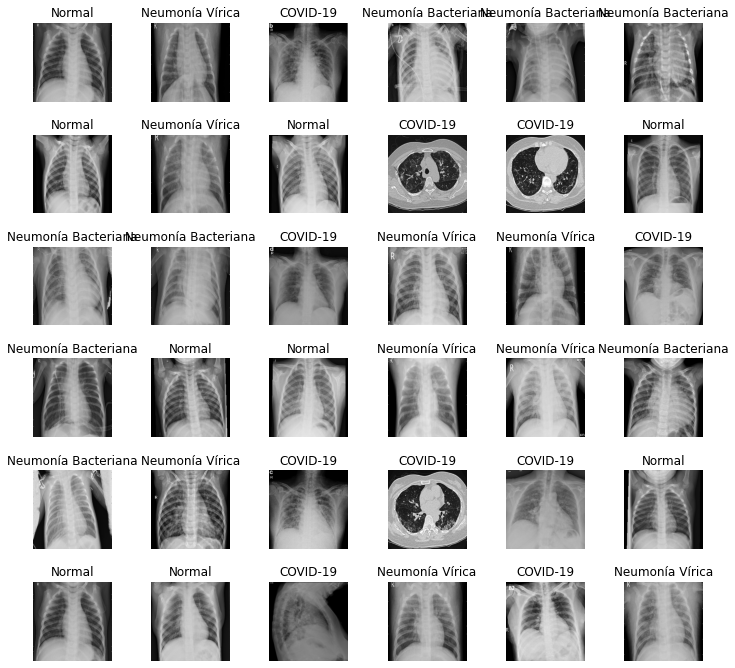

In [ ]:
# Crea una matriz de 36 imágenes junto con sus etiquetas correspondientes
L = 6
W = 6

fig, axes = plt.subplots(L, W, figsize=(12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(train_images[i])
    axes[i].set_title(label_names[np.argmax(train_labels[i])])
    axes[i].axis("off")

plt.subplots_adjust(wspace=0.5)

# TAREA #4: ENTENDER LA TEORÍA Y LA INTUICIÓN DETRAS DE LAS REDES NEURONALES PROFUNDAS

![alt text](https://drive.google.com/uc?id=1QQtagzaEJQVIMn0VJJSVbUw4I_BtZUXe)

![alt text](https://drive.google.com/uc?id=1QN7HyTukU_7-ko__AwDSEgKue7tqwajj)

![alt text](https://drive.google.com/uc?id=1QJ-3l1XKn6HQ7OjnoAvO2SzvtwFdWIqj)

![alt text](https://drive.google.com/uc?id=1QIQI8oNCcSTCDDd1khB2MM_6sdt_I_OR)

# TEORÍA #5: ENTENDER LA TEORÍA Y LA INTUICIÓN DETRÁS DEL APRENDIZAJE POR TRANSFERENCIA

![alt text](https://drive.google.com/uc?id=1QIFR4n2L0tJC-agoNCE6M8nOnGsuqxC-)

![alt text](https://drive.google.com/uc?id=1QEnuXMnCgLu-LD53ajLAgcFfkgvfQOGl)

![alt text](https://drive.google.com/uc?id=1QAqx7j42HsnEUr_HJAv3xZf2fgOTCi9n)

![alt text](https://drive.google.com/uc?id=1Q0uQFIdn68akpKuwVRtuADueCdA5kA60)

# TAREA #6: IMPORTAR EL MODELO CON PESOS PRE ENTRENADOS

In [ ]:
basemodel = ResNet50(weights="imagenet", include_top=False, input_tensor=Input(shape=(256, 256,3)))

94781440/94765736 [==============================] - 3s 0us/step


In [ ]:
basemodel.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
# Congelar el modelo hasta las últimas etapas - 4 y llevar a cabo un re entrenamiento -5 
for layer in basemodel.layers[:-10]:
    layer.trainable = False

# TAREA #7: CONSTRUIR Y ENTRENAR UN MODELO DE DEEP LEARNING

In [ ]:
headmodel = basemodel.output
headmodel = AveragePooling2D(pool_size=(4, 4))(headmodel)
headmodel = Flatten(name="flatten")(headmodel)
headmodel = Dense(256, activation="relu")(headmodel)
headmodel = Dropout(0.3)(headmodel)
headmodel = Dense(128, activation="relu")(headmodel)
headmodel = Dropout(0.2)(headmodel)
headmodel = Dense(4, activation="softmax")(headmodel)

model = Model(inputs=basemodel.input, outputs=headmodel)

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer=optimizers.RMSprop(learning_rate=1e-4, decay=1e-6), metrics=["accuracy"])

In [ ]:
# Usar la parada temprana (early stopping) para salir del entrenamiento si la pérdida en la validación no disminuye incluso después de ciertas épocas (paciencia)
earlystopping = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=20)

# Almacenar el mejor modelo con la menor pérdida en la validación
checkpointer = ModelCheckpoint(filepath="/content/drive/MyDrive/ds4b/4. Operations Department/weights.hdf5", verbose=1, save_best_only=True)

In [ ]:
train_generator = image_generator.flow_from_directory(batch_size=4, directory=XRay_directory, shuffle=True, target_size=(256, 256), class_mode="categorical", subset="training")
val_generator = image_generator.flow_from_directory(batch_size=4, directory=XRay_directory, shuffle=True, target_size=(256, 256), class_mode="categorical", subset="validation")

Found 428 images belonging to 4 classes.
Found 104 images belonging to 4 classes.


In [ ]:
history = model.fit(train_generator, steps_per_epoch=train_generator.n//4, epochs=25,
                    validation_data=val_generator, validation_steps=val_generator.n//4,
                    callbacks=[checkpointer, earlystopping])

Epoch 1/25
107/107 [==============================] - ETA: 0s - loss: 1.4596 - accuracy: 0.3201
Epoch 1: val_loss improved from inf to 1.44668, saving model to /content/drive/MyDrive/ds4b/4. Operations Department/weights.hdf5
107/107 [==============================] - 209s 2s/step - loss: 1.4596 - accuracy: 0.3201 - val_loss: 1.4467 - val_accuracy: 0.3558
Epoch 2/25
107/107 [==============================] - ETA: 0s - loss: 1.0986 - accuracy: 0.5023
Epoch 2: val_loss improved from 1.44668 to 1.33110, saving model to /content/drive/MyDrive/ds4b/4. Operations Department/weights.hdf5
107/107 [==============================] - 13s 116ms/step - loss: 1.0986 - accuracy: 0.5023 - val_loss: 1.3311 - val_accuracy: 0.4135
Epoch 3/25
107/107 [==============================] - ETA: 0s - loss: 0.9676 - accuracy: 0.5981
Epoch 3: val_loss improved from 1.33110 to 1.00891, saving model to /content/drive/MyDrive/ds4b/4. Operations Department/weights.hdf5
107/107 [==============================] - 14s 1

# TAREA #8: EVALUAR EL MODELO DE DEEP LEARNING ENTRENADO

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

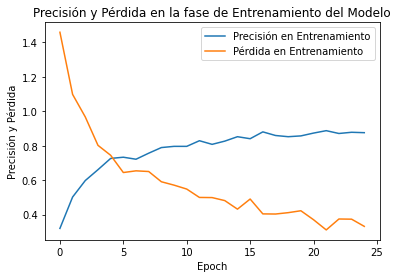

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["loss"])

plt.title("Precisión y Pérdida en la fase de Entrenamiento del Modelo")
plt.xlabel("Epoch")
plt.ylabel("Precisión y Pérdida")
plt.legend(["Precisión en Entrenamiento", "Pérdida en Entrenamiento"])

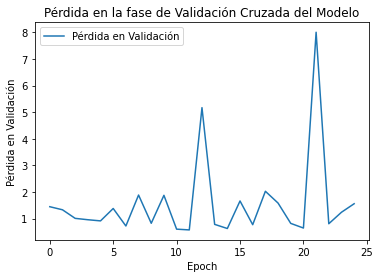

In [ ]:
plt.plot(history.history["val_loss"])

plt.title("Pérdida en la fase de Validación Cruzada del Modelo")
plt.xlabel("Epoch")
plt.ylabel("Pérdida en Validación")
plt.legend(["Pérdida en Validación"])

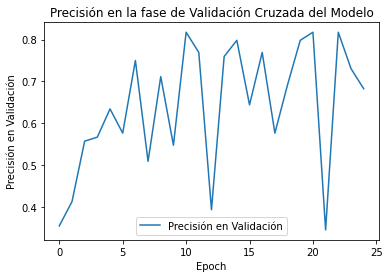

In [ ]:
plt.plot(history.history["val_accuracy"])

plt.title("Precisión en la fase de Validación Cruzada del Modelo")
plt.xlabel("Epoch")
plt.ylabel("Precisión en Validación")
plt.legend(["Precisión en Validación"])

In [ ]:
test_directory = "/content/drive/MyDrive/ds4b/4. Operations Department/test"

In [ ]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_directory(batch_size=40, directory=test_directory, shuffle=True, target_size=(256, 256), class_mode="categorical")

evaluate = model.evaluate(test_generator, steps=test_generator.n//4, verbose=1)

print("Precisión en la fase de test: {}".format(evaluate[1]))

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

prediction = []
original = []
image = []

for i in range(len(os.listdir(test_directory))):
    for item in os.listdir(os.path.join(test_directory, str(i))):
        img = cv2.imread(os.path.join(test_directory, str(i), item))
        img = cv2.resize(img, (256, 256))
        image.append(img)
        img = img/255
        img = img.reshape(-1, 256, 256, 3)
        predict = model.predict(img)
        predict = np.argmax(predict)
        prediction.append(predict)
        original.append(i)

In [ ]:
len(original)

40

In [ ]:
score = accuracy_score(original, prediction)
print("Eficacia de la predicción: {}".format(score))

Eficacia de la predicción: 0.6


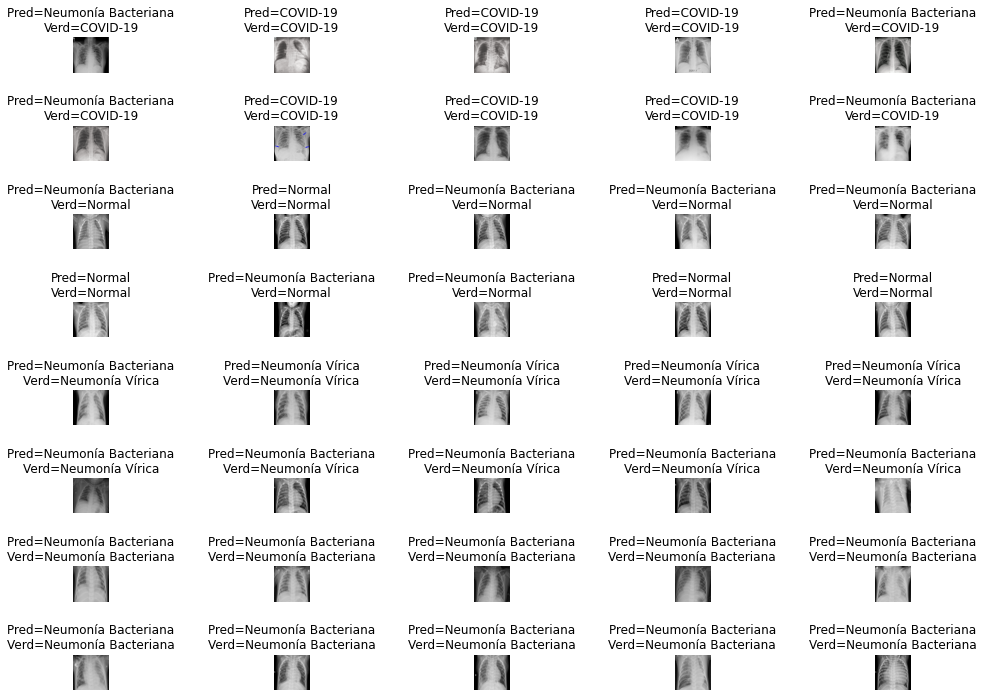

In [ ]:
L = 8
W = 5

fig, axes = plt.subplots(L, W, figsize=(16, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(image[i])
    axes[i].set_title("Pred={}\nVerd={}".format(str(label_names[prediction[i]]), str(label_names[original[i]])))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1.2, hspace=1.5)

In [ ]:
print(classification_report(np.asarray(original), np.asarray(prediction)))

              precision    recall  f1-score   support

           0       1.00      0.60      0.75        10
           1       1.00      0.40      0.57        10
           2       1.00      0.40      0.57        10
           3       0.38      1.00      0.56        10

    accuracy                           0.60        40
   macro avg       0.85      0.60      0.61        40
weighted avg       0.85      0.60      0.61        40



Text(0.5, 1.0, 'Matriz de Confusión')

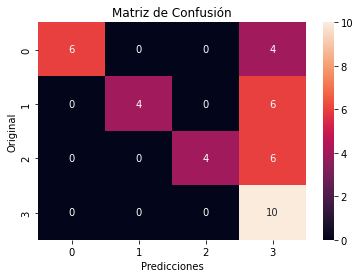

In [ ]:
cm = confusion_matrix(np.asarray(original), np.asarray(prediction))
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax)
ax.set_xlabel("Predicciones")
ax.set_ylabel("Original")
ax.set_title("Matriz de Confusión")

# BUEN TRABAJO! PUEDES ESTAR ORGULLOSO DE TUS NUEVAS HABILIDADES ADQUIRIDAS
